In [97]:
from os.path import dirname, abspath
from os.path import join
import PIL
from PIL.Image import open, new, fromarray
from PIL.ImageOps import expand
from matplotlib.pyplot import savefig, imshow, set_cmap
import matplotlib.pyplot as plt
import numpy as np

from numpy import linalg as LA

# Load CBCL Faces Dataset

In [98]:
import scipy.io

mat = scipy.io.loadmat('./X.mat')
print(mat['X'].shape)
dataset = mat['X']
print(dataset.shape)


(2429, 361)
(2429, 361)


## Visualize some faces

In [99]:
def visualize(faces):
    n = 16
    fig, axs = plt.subplots(n, n, figsize=(19, 19))
    for i in range(n*n):
        ax = axs[i//n, i%n]
        ax.imshow(faces[i,:].reshape(19, 19).T, cmap='gray')
        ax.axis('off')

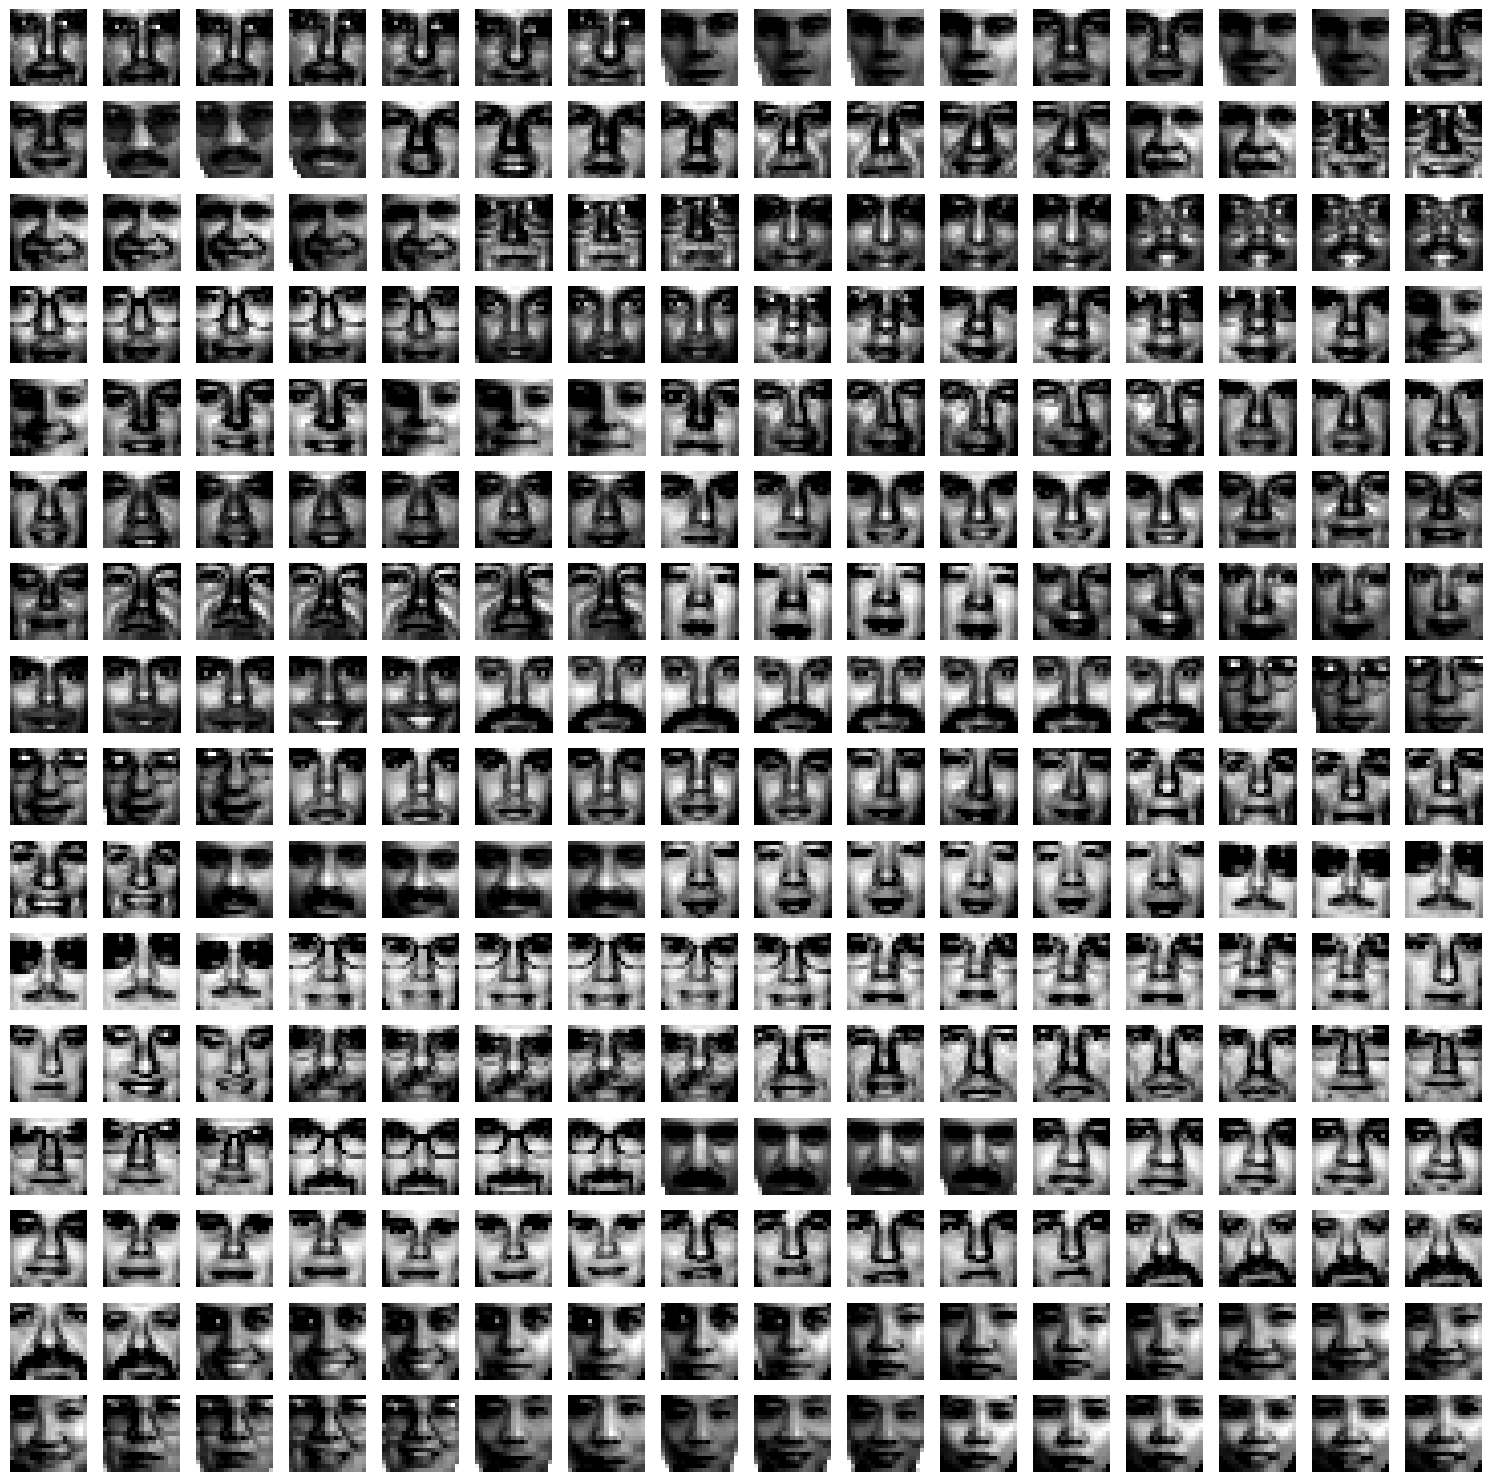

In [100]:
visualize(dataset)

In [101]:
def w_gradient(W, H, A):
    # N = W.shape[0]
    # R = W.shape[1]
    # M = H.shape[1]
    # gradient = np.zeros((N, R))
    # for n in range(N):
    #     for r in range(R):
    #         for m in range(M):
    #             gradient[n, r] += 2*H[r, m] * (np.dot(W[n, :], H[:, m]) - A[n, m])
    gradient = 2 * (W @ H - A) @ H.T
    return gradient


In [102]:
def h_gradient(W, H, A):
    N = W.shape[0]
    R = W.shape[1]
    M = H.shape[1]
    # gradient = np.zeros((N, R))
    # for r in range(R):
    #     for m in range(M):
    #         for n in range(N):
    #             gradient[r, m] += 2*W[n, r] * (np.dot(W[n, :], H[:, m]) - A[n, m])
    gradient = 2 * W.T @ (W @ H - A)
    return gradient

In [ ]:
def NMF(A):
    nr_iterations = 1000 # choose good number of iterations (should be large, convergence might be very slow)
    alpha = 0.001 # choose such that algorithm converges and but not too small such that convergence will be slower than necessary
    r = 256 # the rank of the factorization

    # initialize W and H
    W = np.random.randn(A.shape[0], r) * 0.1  # Random numbers from normal distribution
    H = np.random.randn(r, A.shape[1]) * 0.1    
    
    for i in range(nr_iterations):
        print(f"iteration {i}, error: {LA.norm(A - W @ H)}")
        W_next = np.maximum((W - alpha * w_gradient(W, H, A)), 0)
        H_next = np.maximum((H - alpha * h_gradient(W, H, A)), 0)
        W,H = W_next, H_next

    return W, H

In [104]:
W,H = NMF(dataset)

iteration 0, error: 356.77174987446347
iteration 1, error: 239.9549566967724
iteration 2, error: 170.97292372990057
iteration 3, error: 167.38453514798164
iteration 4, error: 165.30020915161154
iteration 5, error: 163.93972617016578
iteration 6, error: 162.8295573524306
iteration 7, error: 161.94930245823085
iteration 8, error: 161.15759237108077
iteration 9, error: 160.4525453152189
iteration 10, error: 159.7825813118777
iteration 11, error: 159.13897426329405
iteration 12, error: 158.50150110070837
iteration 13, error: 157.85897588965628
iteration 14, error: 157.20303479515607
iteration 15, error: 156.52285888797476
iteration 16, error: 155.81443676666206
iteration 17, error: 155.06922399100304
iteration 18, error: 154.28488015901704
iteration 19, error: 153.4564017123562
iteration 20, error: 152.5818440043273
iteration 21, error: 151.6600151296946
iteration 22, error: 150.69047048438802
iteration 23, error: 149.6753871407598
iteration 24, error: 148.61716731214935
iteration 25, erro

In [105]:
print(f"W.shape = {W.shape}, H.shape = {H.shape}")

W.shape = (2429, 256), H.shape = (256, 361)


## Face parts

The matrix H consists after optimization of face parts and each face in the dataset is a positive combination of those.

Let us visualize some entries of H.

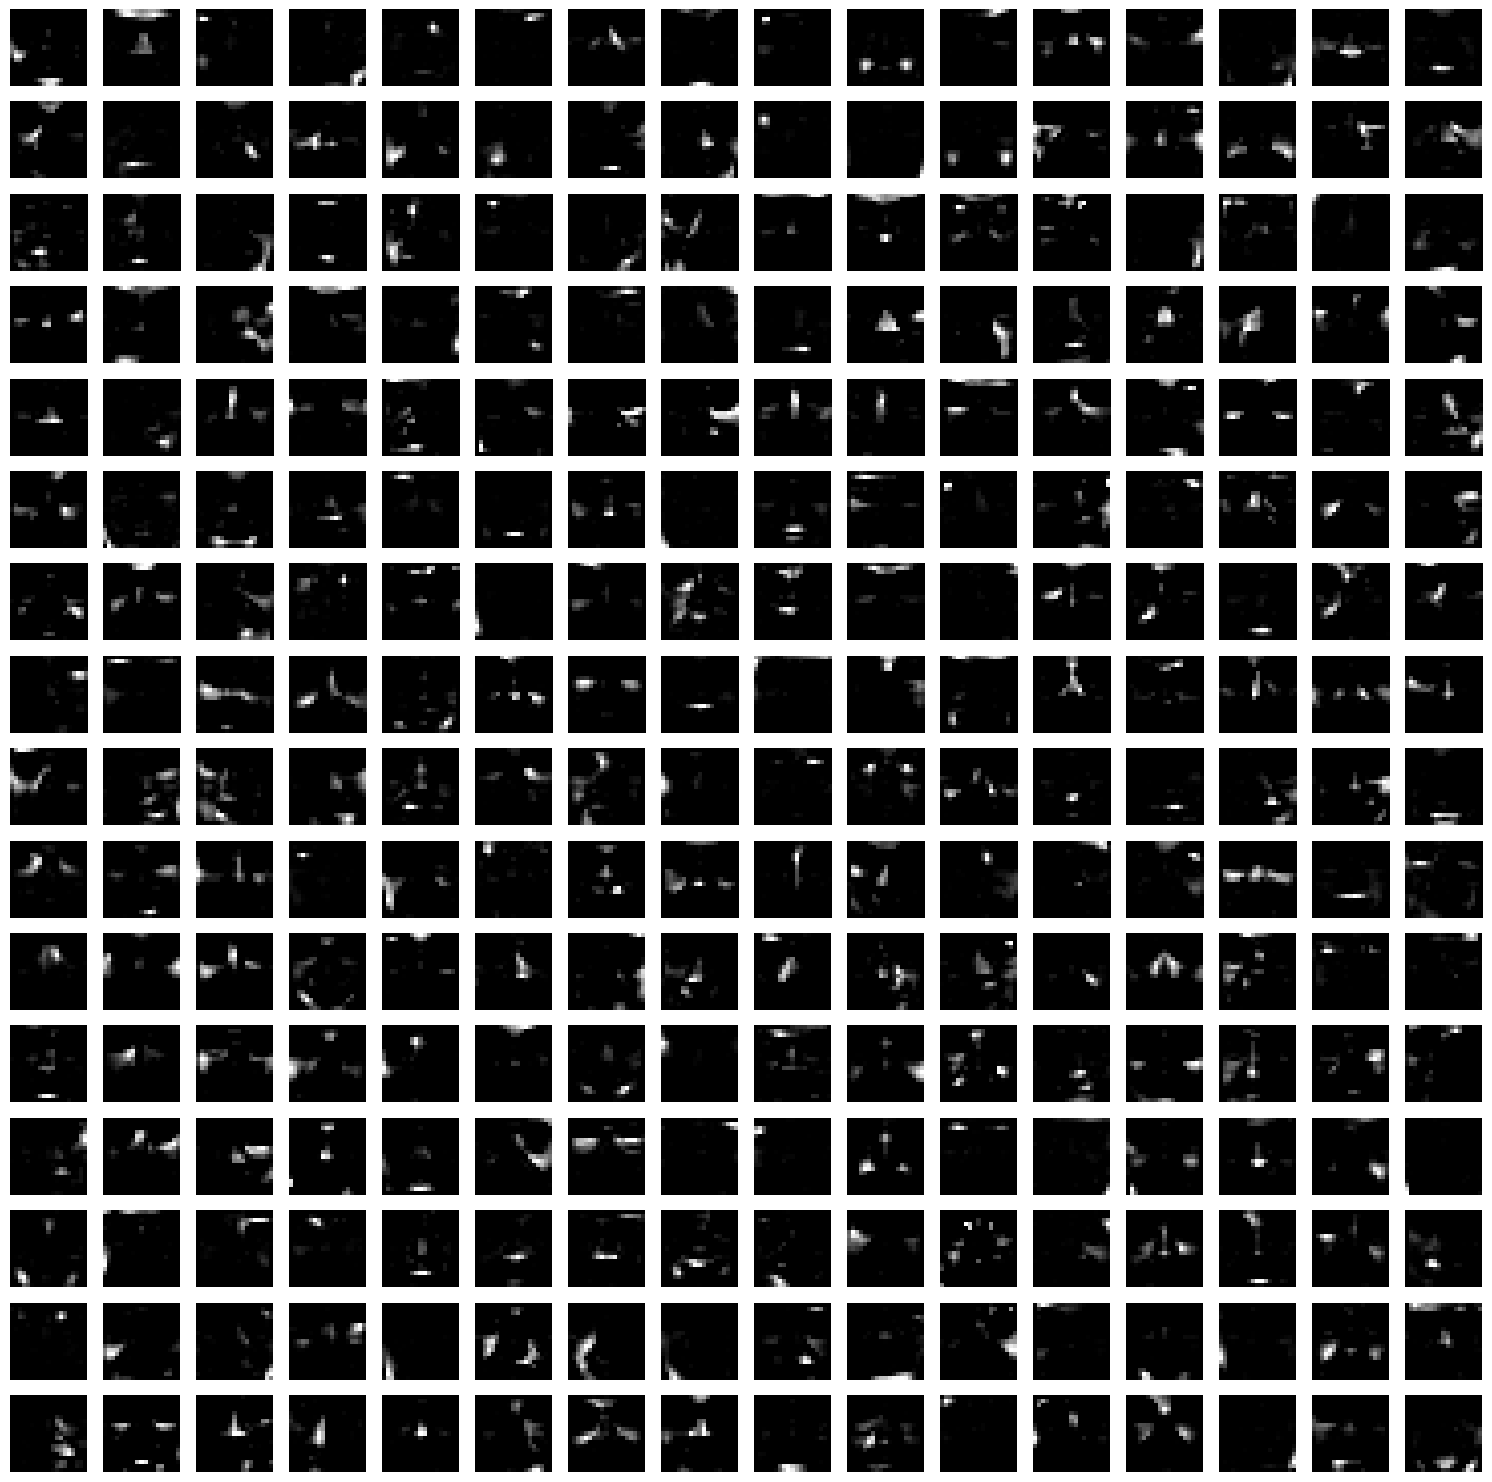

In [106]:
visualize(H)

## Reconstruction

Let us reconstruct the first face in the dataset given the NMF.

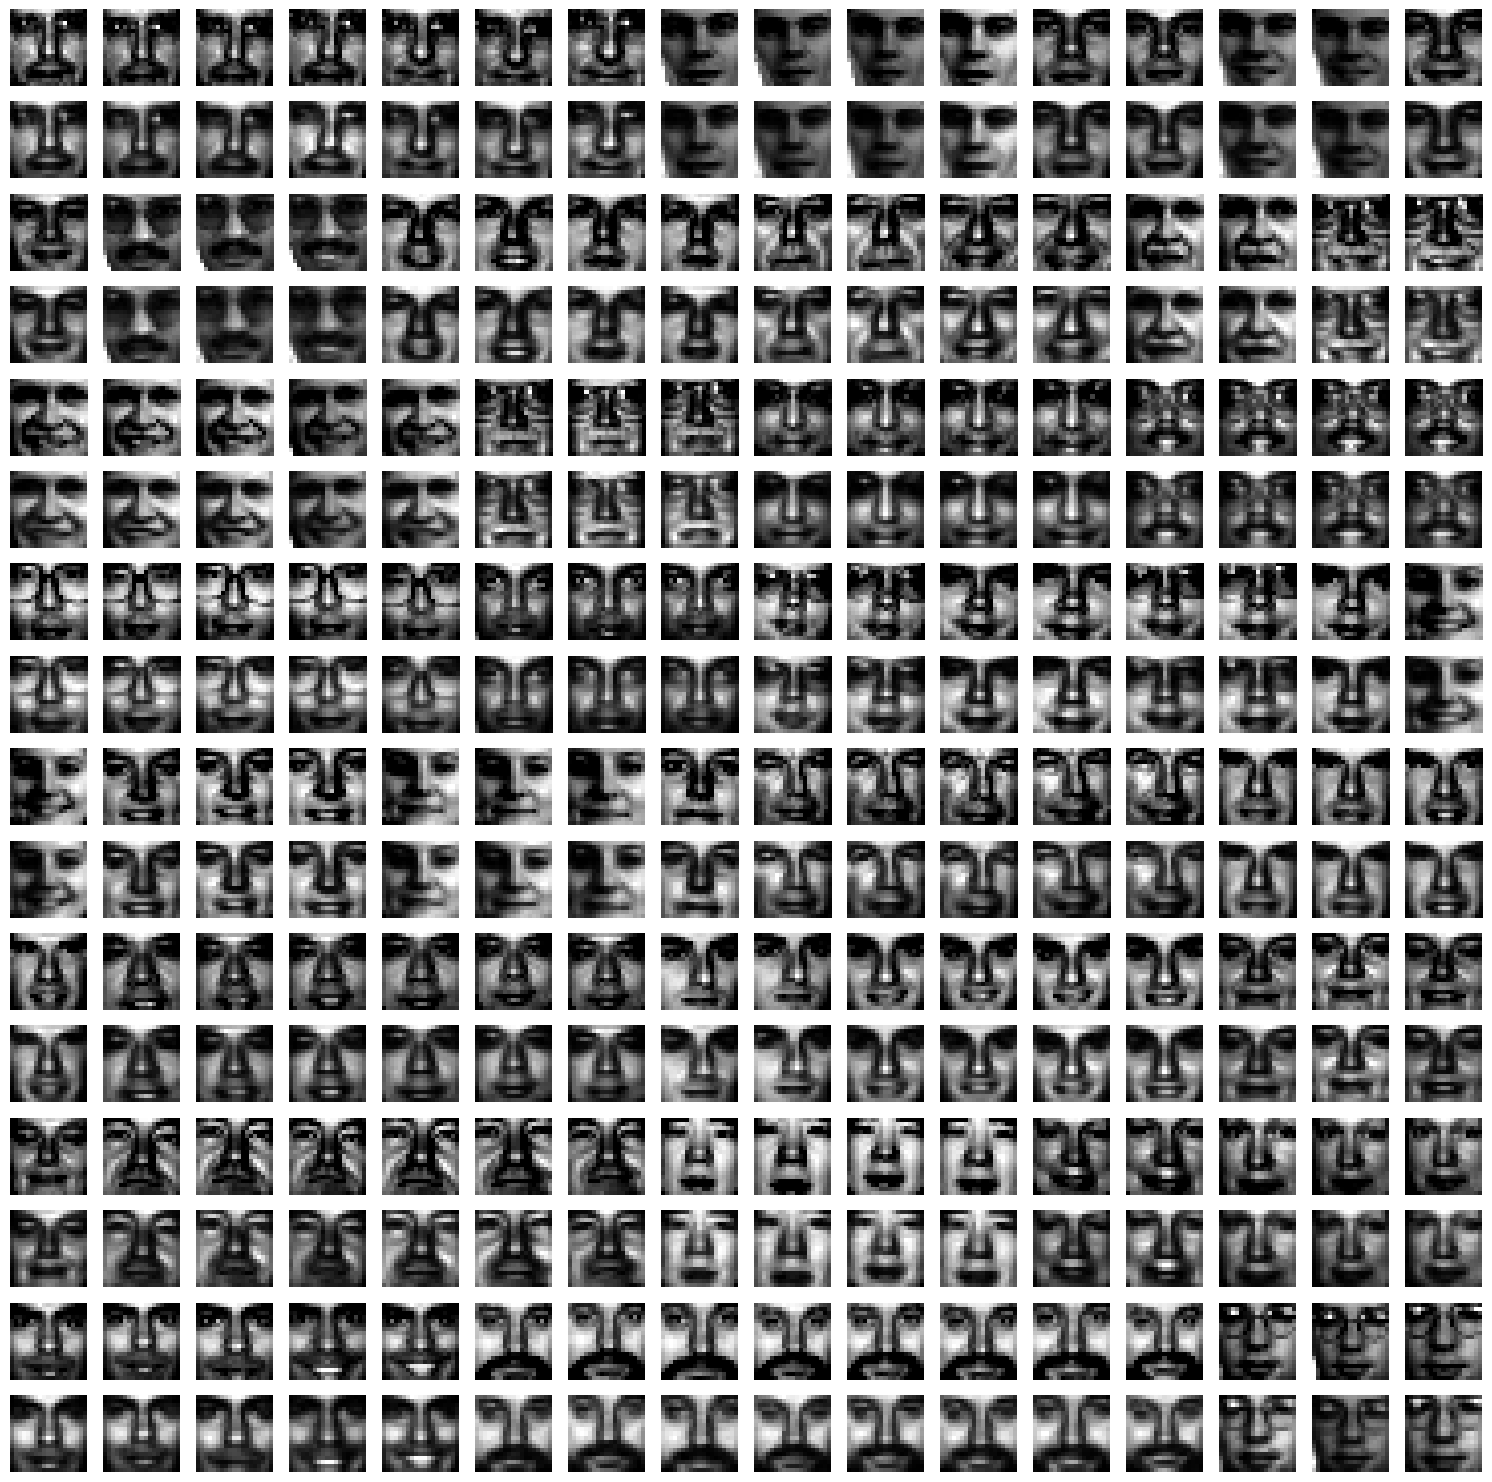

In [107]:
n = 16
fig, axs = plt.subplots(n, n, figsize=(19, 19))
for i in range(n*(n//2)):
    face = dataset[i,:].reshape(19, 19).T
    recon = (W[i,:] @ H).reshape(19, 19).T

    ax = axs[i//n * 2, i%(n)]
    ax.imshow(face, cmap='gray')
    ax.axis('off')
    ax = axs[i//n * 2 + 1, i%(n)]
    ax.imshow(recon, cmap='gray')
    ax.axis('off')